In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.style.use('plotting.mplstyle')
import numpy as np
np.random.seed(15)
import h5py

In [2]:
# Load AR results
precomputed_data = h5py.File("./../data/ar_chi_cost_summary.hdf","r")
chis = precomputed_data['posterior/chis'][()]
costs = precomputed_data['posterior/costs'][()]
dR_dchis = precomputed_data['posterior/dR_dchis'][()]
dR_dcosts = precomputed_data['posterior/dR_dcosts'][()]
f_chis = precomputed_data['posterior/f_chis'][()]
f_costs = precomputed_data['posterior/f_costs'][()]

## Plot our AR measurements of spin magnitude and tilt distributions

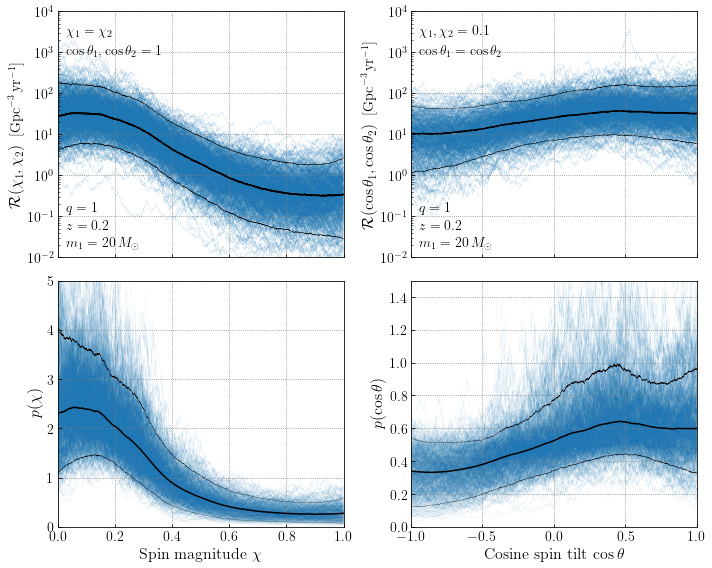

In [3]:
################################
# Merger rate vs. spin magnitude
################################

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221)
ax.set_rasterization_zorder(1)

# Plot a random set of posterior samples      
for i in np.random.choice(range(dR_dchis.shape[1]),size=500,replace=False):                 
    ax.plot(chis,dR_dchis[:,i],color='#1f78b4',alpha=0.2,lw=0.2,zorder=0)
    
# Highlight median and 90% bounds
ax.plot(chis,np.median(dR_dchis,axis=1),color='black')
ax.plot(chis,np.quantile(dR_dchis,0.05,axis=1),color='black',lw=0.3)
ax.plot(chis,np.quantile(dR_dchis,0.95,axis=1),color='black',lw=0.3)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(0,1)
ax.set_ylim(1e-2,1e4)
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_ylabel(r'$\mathcal{R}(\chi_1,\chi_2)$ \,{\Large[$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}$]}',fontsize=16)

# Label our reference values
ax.text(0.03,0.92,r'$\chi_1 = \chi_2$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.03,0.84,r'$\cos\theta_1,\cos\theta_2 = 1$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.03,0.20,r'$q=1$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.03,0.13,r'$z=0.2$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.03,0.06,r'$m_1=20\,M_\odot$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)


################################
# Merger rate vs. spin tilts
################################

ax = fig.add_subplot(222)
ax.set_rasterization_zorder(1)

# Plot a random subset of samples
for i in np.random.choice(range(dR_dcosts.shape[1]),size=500,replace=False):                 
    ax.plot(costs,dR_dcosts[:,i],color='#1f78b4',alpha=0.2,lw=0.2,zorder=0)
    
# Highlight median and 90% bounds
ax.plot(costs,np.median(dR_dcosts,axis=1),color='black')
ax.plot(costs,np.quantile(dR_dcosts,0.05,axis=1),color='black',lw=0.3)
ax.plot(costs,np.quantile(dR_dcosts,0.95,axis=1),color='black',lw=0.3)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(1e-2,1e4)
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_ylabel(r'$\mathcal{R}(\cos\theta_1,\cos\theta_2)$ \,{\Large[$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}$]}',fontsize=16)

# Label reference values
ax.text(0.03,0.92,r'$\chi_1,\chi_2=0.1$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.03,0.84,r'$\cos\theta_1=\cos\theta_2$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.03,0.20,r'$q=1$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.03,0.13,r'$z=0.2$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.text(0.03,0.06,r'$m_1=20\,M_\odot$',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,fontsize=14)

########################################
# Probability density of spin magnitudes
########################################

ax = fig.add_subplot(223)
ax.set_rasterization_zorder(1)

# Normalize to probability distribution over individual component spin magnitudes
p_chi = f_chis/np.trapz(f_chis,chis,axis=0)

# Plot a subset of samples
for i in np.random.choice(range(p_chi.shape[1]),size=500,replace=False):                 
    ax.plot(chis,p_chi[:,i],color='#1f78b4',alpha=0.2,lw=0.1,zorder=0)
    
# Highlight 90% bounds
ax.plot(chis,np.mean(p_chi,axis=1),color='black')
ax.plot(chis,np.quantile(p_chi,0.05,axis=1),color='black',lw=0.2)
ax.plot(chis,np.quantile(p_chi,0.95,axis=1),color='black',lw=0.2)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(0,1)
ax.set_ylim(0,5)
ax.set_xlabel('Spin magnitude $\chi$',fontsize=16)
ax.set_ylabel(r'$p(\chi)$',fontsize=16)

########################################
# Probability density of spin tilts
########################################

ax = fig.add_subplot(224)
ax.set_rasterization_zorder(1)

# Construct normalized probability distributions
p_cost = f_costs/np.trapz(f_costs,costs,axis=0)
      
for i in np.random.choice(range(p_cost.shape[1]),size=500,replace=False):                 
    ax.plot(costs,p_cost[:,i],color='#1f78b4',alpha=0.2,lw=0.1,zorder=0)
    
ax.plot(costs,np.mean(p_cost,axis=1),color='black')
ax.plot(costs,np.quantile(p_cost,0.05,axis=1),color='black',lw=0.2)
ax.plot(costs,np.quantile(p_cost,0.95,axis=1),color='black',lw=0.2)

ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1.5)
ax.set_xlabel('Cosine spin tilt $\cos \\theta$',fontsize=16)
ax.set_ylabel(r'$p(\cos\theta)$',fontsize=16)

plt.tight_layout()
plt.savefig('figure_08.pdf',bbox_inches='tight',dpi=200)
plt.show()